# **SyriaTel Customer Churn Prediction**

Author: lynette.mwiti@student.moringaschool.com

## 1.Business Understanding

### Problem Statement

SyriaTel is a telecommunications company experiencing a high churn rate, meaning many customers are leaving and switching to competitors. The company seeks to understand the factors leading to churn and develop a predictive model to identify at-risk customers. The ultimate goal is to reduce churn, increase customer retention, and enhance profitability.

### Specific Objectives

* Identify factors leading to customer churn.
* Develop an accurate predictive model for customer churn.
* Implement strategies to retain customers identified as at risk of churning.



### Success Metrics

The success criteria for this project include:

* Developing a robust churn prediction model with high recall score of 0.8

* Identifying the key features and factors that significantly contribute to customer churn.

* Providing actionable insights and recommendations to the telecom company for reducing churn and improving customer retention.

* Demonstrating the value of churn prediction models in enabling proactive retention strategies and reducing revenue losses due to customer churn.

## 2. Data Understanding

###**Data Source & Size**

The data we are going to use is called customer_churn.csv from syriatel company found in syria it has 3333 records

###**Variables description**

Below is the description of our variables;

`state: `The state of the customer.

`account length:` The length of the account in days or months.

`area code:` The area code of the customer's phone number.

`phone number:` The phone number of the customer.

`international plan:` Whether the customer has an international plan or not.

`voice mail plan: ` Whether the customer has a voicemail plan or not.

`number vmail messages:` The number of voicemail messages the customer has.

`total day minutes:` Total minutes of day calls.

`total day calls:` Total number of day calls.

`total day charge: `Total charge for the day calls.

`total eve minutes:` Total minutes of evening calls.

`total eve calls: `Total number of evening calls.

`total eve charge: `Total charge for the evening calls.

`total night minutes:` Total minutes of night calls.

`total night calls: `Inline code` Total number of night calls.

`total night charge: `Total charge for the night calls.

`total intl minutes:` Total minutes of international calls.

`total intl calls:` Total number of international calls.

`total intl charge:` Total charge for the international calls.

`customer service calls:` Number of times the customer called customer service.

`churn:` Whether the customer churned or not (True/False).

In [54]:
# Import modules & packages

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px

# Modeling
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from imblearn.over_sampling import SMOTE,SMOTENC
from sklearn.metrics import f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report # performance metrics
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Algorithms for supervised learning methods
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import XGBClassifier

# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

In [55]:
#loading the data
df=pd.read_csv('/content/customerchurn.csv')

In [56]:
df.head() #shows the first top 5 records

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [57]:
df.sample (10) #sample random 10 records

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
1785,MO,45,510,398-2628,no,yes,29,135.8,104,23.09,...,101,18.91,235.6,92,10.60,7.9,6,2.13,2,False
1750,ME,23,510,376-9607,no,no,0,113.1,74,19.23,...,95,14.35,262.9,126,11.83,6.9,2,1.86,1,True
1371,ND,190,415,391-5442,no,no,0,169.4,102,28.80,...,113,21.55,197.1,93,8.87,8.9,5,2.40,1,False
1450,NV,93,408,335-3880,no,no,0,114.3,100,19.43,...,103,18.79,126.3,88,5.68,10.9,9,2.94,0,False
611,KY,90,415,334-8817,no,no,0,193.7,83,32.93,...,79,13.11,299.0,60,13.46,12.7,3,3.43,1,False
626,NJ,95,408,348-8015,yes,yes,37,220.2,109,37.43,...,99,15.75,205.1,82,9.23,4.1,2,1.11,0,True
84,TX,106,510,395-3026,no,no,0,210.6,96,35.80,...,85,21.18,191.4,88,8.61,12.4,1,3.35,2,True
1981,ME,66,510,331-6270,no,no,0,118.0,133,20.06,...,99,21.09,214.4,122,9.65,5.3,5,1.43,1,False
2230,NC,109,510,361-9839,yes,no,0,209.1,141,35.55,...,93,17.43,119.4,111,5.37,7.8,3,2.11,2,False
576,FL,92,415,349-9566,no,no,0,201.9,74,34.32,...,119,19.28,217.5,80,9.79,13.7,6,3.70,3,False


In [58]:
#Shape of the dataframe
print("The number of rows: {}".format(df.shape[0]))

print("The number of columns:{}".format(df.shape[1]))

The number of rows: 3333
The number of columns:21


In [59]:
df.info() #General overview of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

From the above info, we have no missing values and have 8 columns that are **integer dtype** 4 that are **object dtype**, 8 that ara **float dtype** and 1 **boolean dtype.**

In [60]:
df.describe(include= 'all') # this shows numerical columns and gives their summary

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333,3333.000000,3333.000000,3333,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,NaN,3333,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,382-4657,no,no,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,106,NaN,NaN,1,3010,2411,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,437.182418,NaN,NaN,NaN,8.099010,179.775098,100.435644,30.562307,...,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,42.371290,NaN,NaN,NaN,13.688365,54.467389,20.069084,9.259435,...,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,408.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,NaN,NaN,0.000000,143.700000,87.000000,24.430000,...,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,415.000000,NaN,NaN,NaN,0.000000,179.400000,101.000000,30.500000,...,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,NaN,20.000000,216.400000,114.000000,36.790000,...,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


In [61]:
# Numerical Columns
print(f"The Numerical Columns include: {df.select_dtypes(include='number').columns}\n")

# Categorical Columns
print(f"The Categorical Columns include : {df.select_dtypes(include='object').columns}")

The Numerical Columns include: Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')

The Categorical Columns include : Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')


## 3.Data Preparation

###3.1 Data Cleaning

We will start by checking for missing values

In [62]:
df.isnull().sum() #we seem not to have any missing values in these dataset

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

We seem not have any missing values in the customer churn dataset

In [63]:
df.duplicated().sum() #shows if we have duplicated data, and we seem not to have any duplicated rows observed

0

We also not have any duplicates rows in the dataset

Change the area code column to an object dataset and also drop the phone number column as adds no value to the analysis

In [64]:
#Converting area code to object data type
df['area code'] = df['area code'].astype(object)

In [65]:
#dropping the phone number column
df = df.drop('phone number', axis=1)

### 3.2 Exploratory Data Analysis (EDA)

**A.) Univariate Analysis**

In this section, we'll explore each column in the dataset to see the distributions, central tendency, and spread of the feature, as well as identify any outliers or patterns present within it.

In [66]:
# Check the number of unique values in all columns to determine feature type
df.nunique()

state                       51
account length             212
area code                    3
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

**Distribution of churn feature**

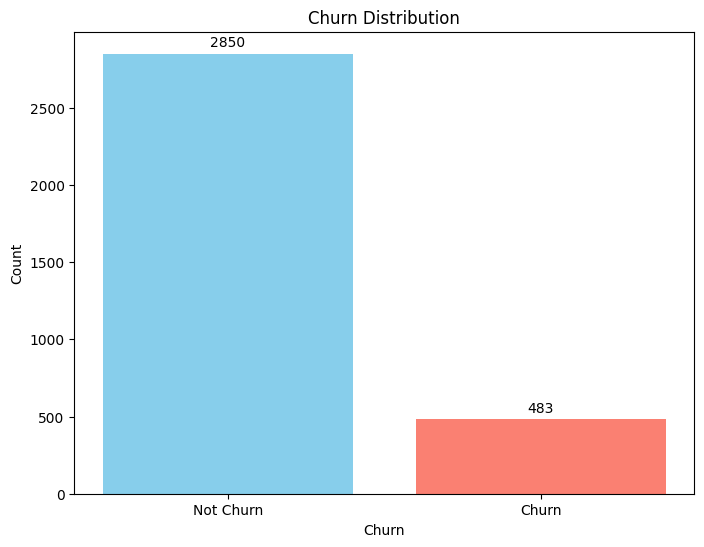

In [67]:
#plotting the target variable distribution using seaborn
# Define custom colors for the categories

class_counts = df['churn'].value_counts()

# Define custom colors for the categories
colors = ['skyblue', 'salmon']

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(class_counts.index, class_counts.values, color=colors)

# Customize the plot
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1],labels=['Not Churn', 'Churn'])

# Add numerical labels on the bars
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

# Show the plot
plt.show()

Out of the 3,333 customers in the dataset, 483 have terminated their contract. That is 14.49% of customers lost. The distribution of the binary classes shows a data imbalance. This needs to be addressed before modeling as an unbalanced feature can cause the model to make false predictions.

**Distribution of the 'area code' feature**

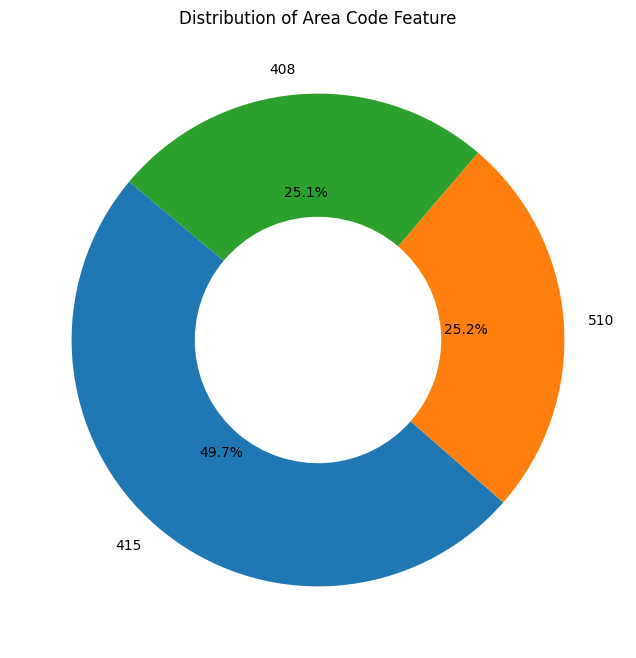

In [68]:
# Pie chart of area code feature
# Get the value counts for the 'area code' feature
area = df['area code'].value_counts()
transactions = area.index
quantities = area.values

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(quantities, labels=transactions, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.5))

# Customize the plot
plt.title('Distribution of Area Code Feature')

# Show the plot
plt.show()

It is true to say that majority (49.7%) of the customers are in **area code 415**.
while **area code 510** and **408** are 25.2% and 25.1% respectively.

**Distrubution Plots for Numeric Features**

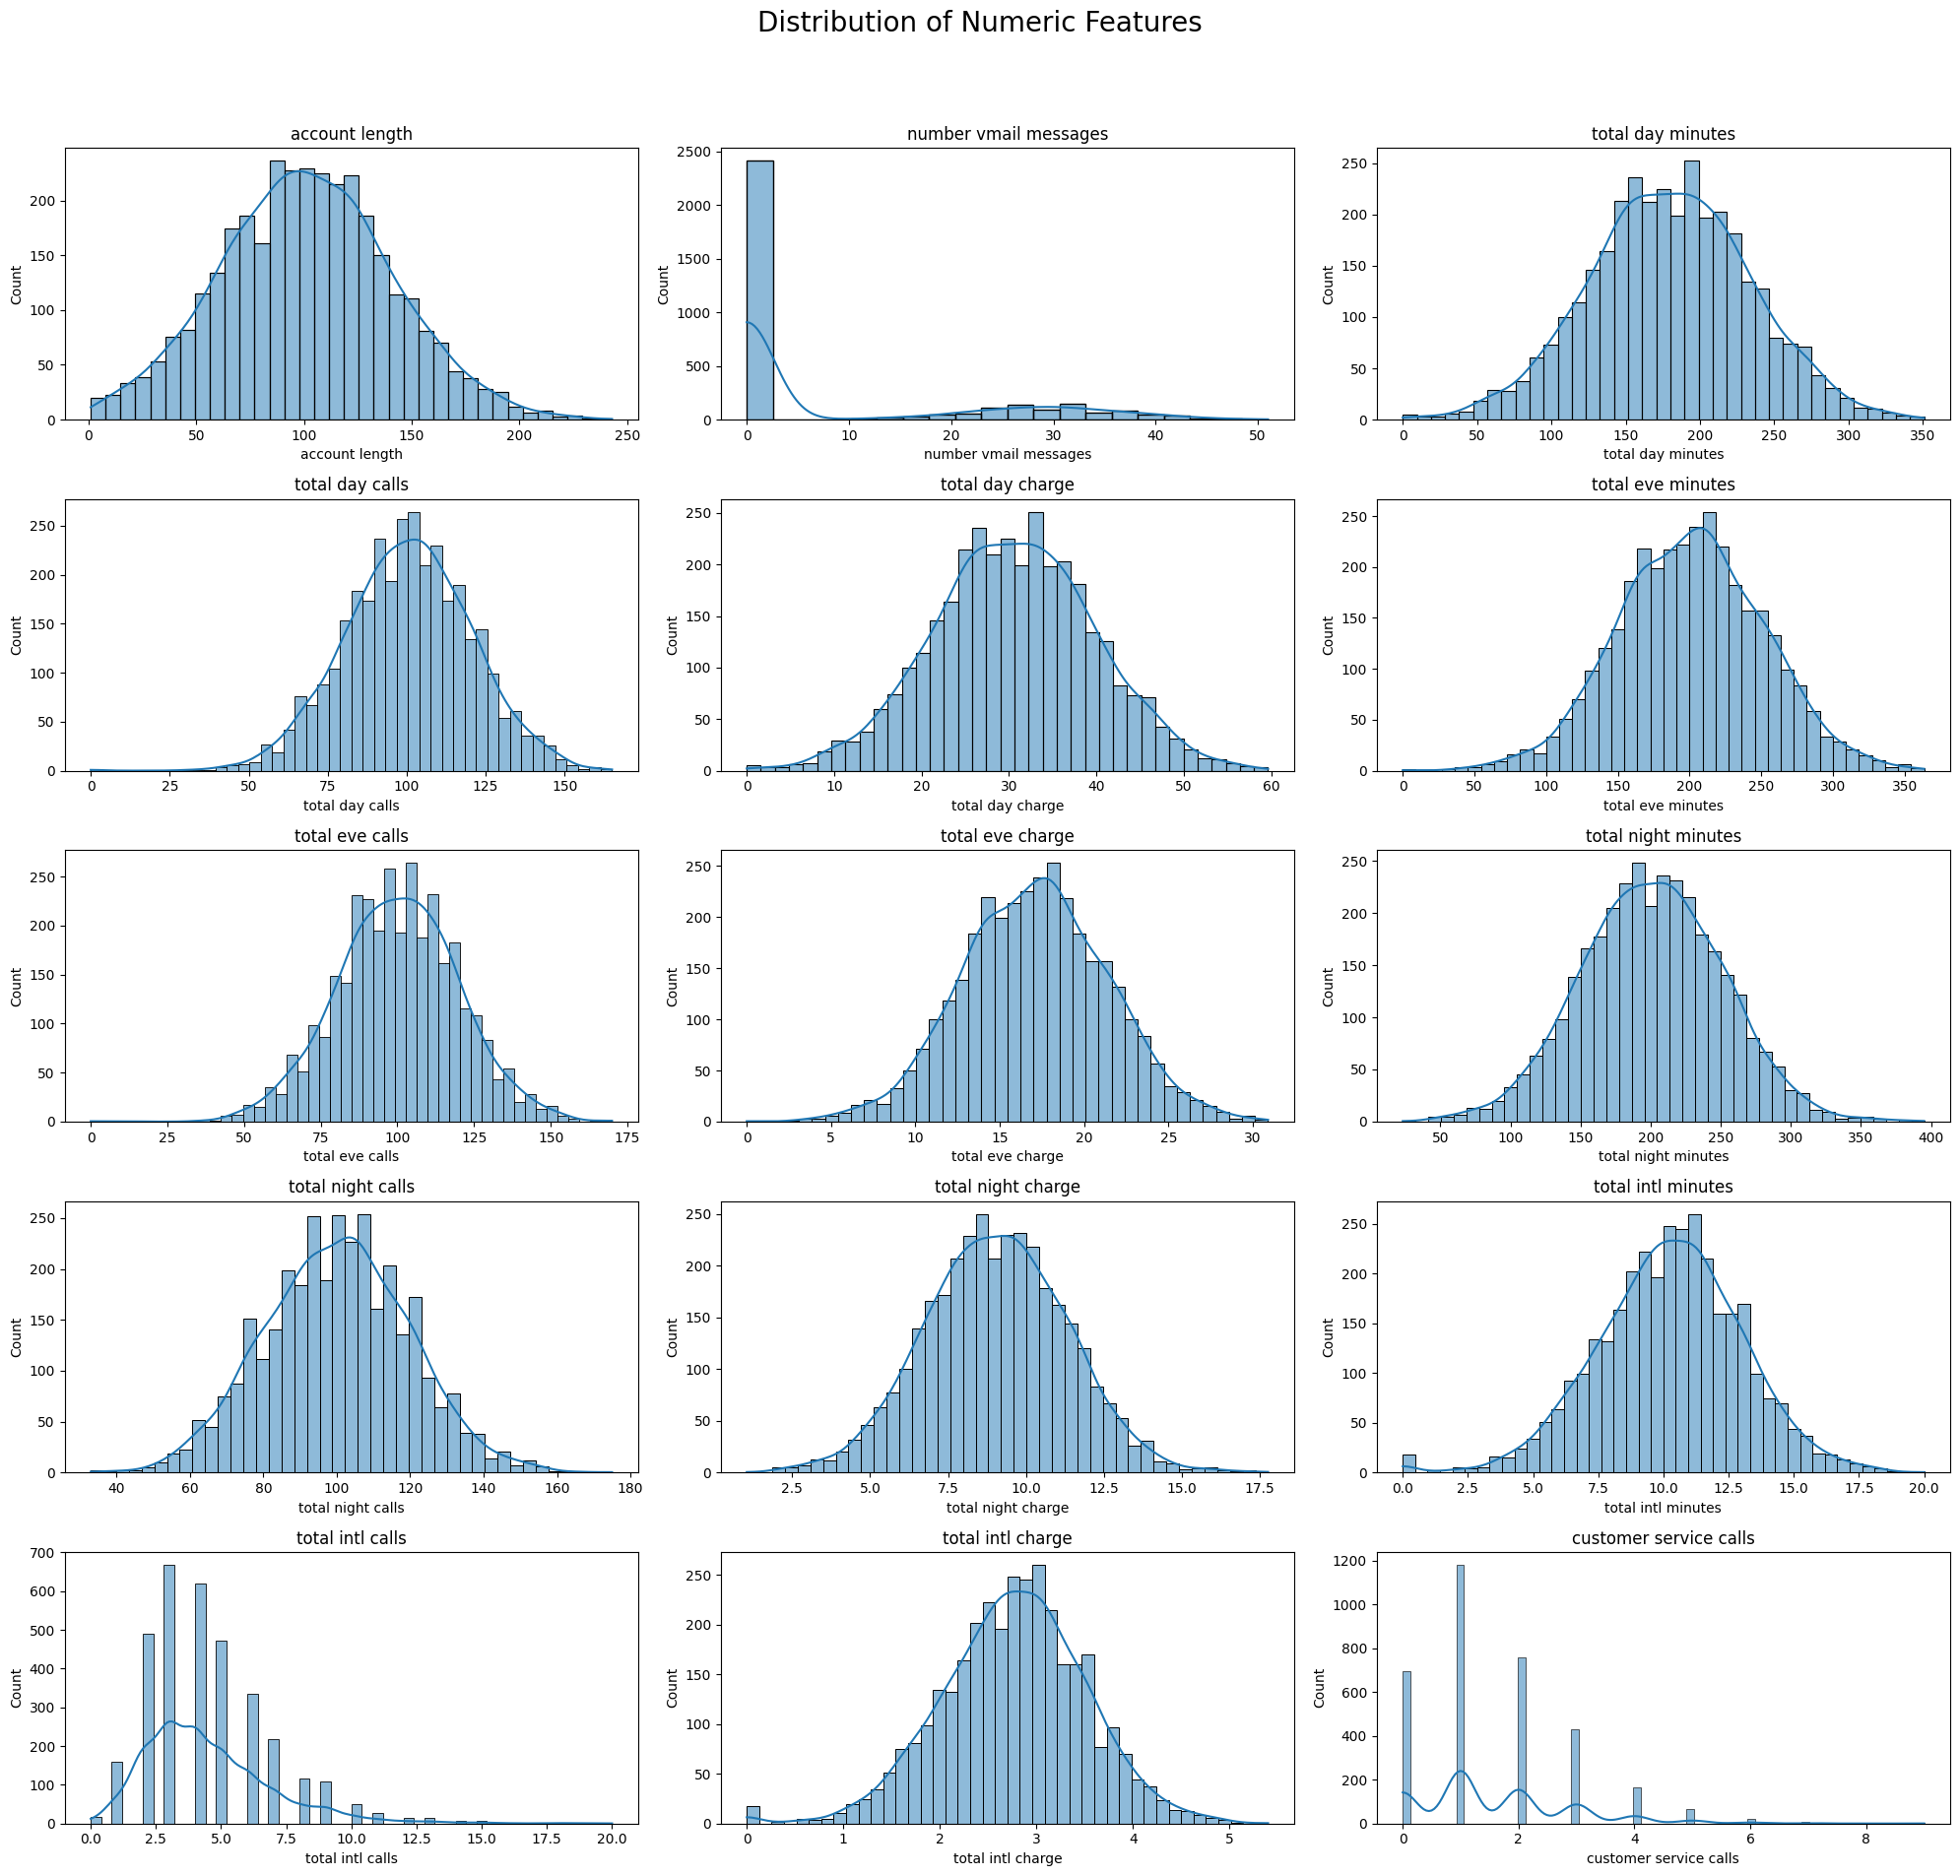

In [69]:
# List of numeric features to check for distribution
numeric_features = [
    'account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge',
    'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls',
    'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls'
]

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))
plt.suptitle('Distribution of Numeric Features', fontsize=20)

# Iterate over each numeric feature to create a histogram
for i, feature in enumerate(numeric_features):
    plt.subplot(5, 3, i + 1)  # Adjust the subplot grid size and position
    sns.histplot(df[feature], kde=True)
    plt.title(feature)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()

* From the above plots the distribution plots show that all of them have a normal distribution, except `customer service calls` and `number vmail messages.`
* Total international calls is mostly skewed to the right side however it is still normally distributed.
* The histogram for customer service calls shows several peaks, indicating that there are multiple modes in the data. This is expected, as the number of customer service calls is an integer value rather than a float.


**Distribution of categorical features**

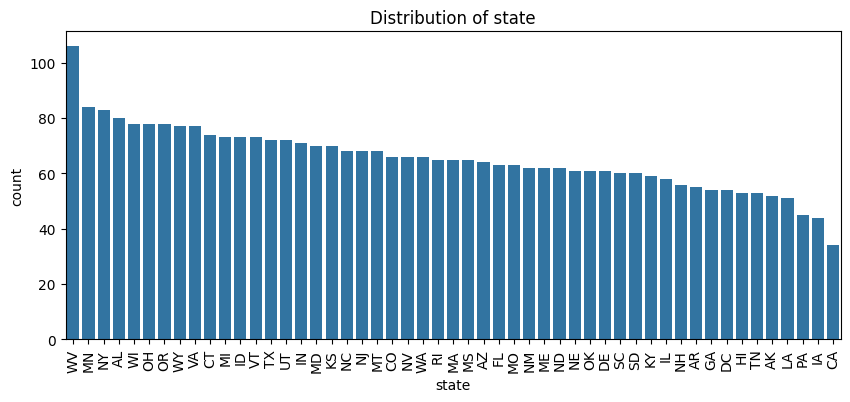

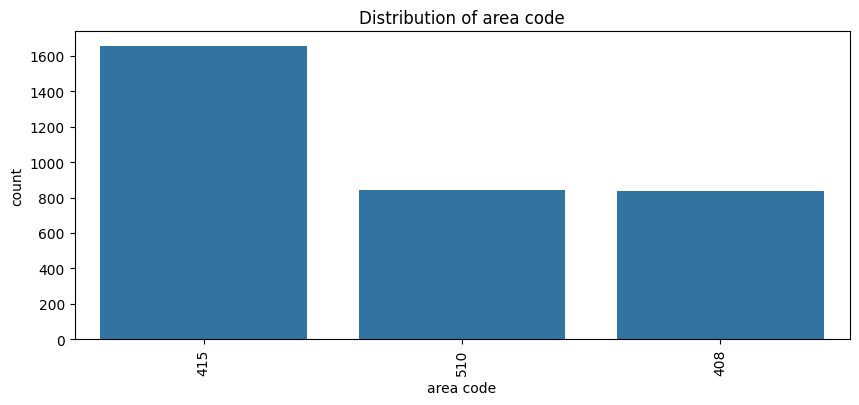

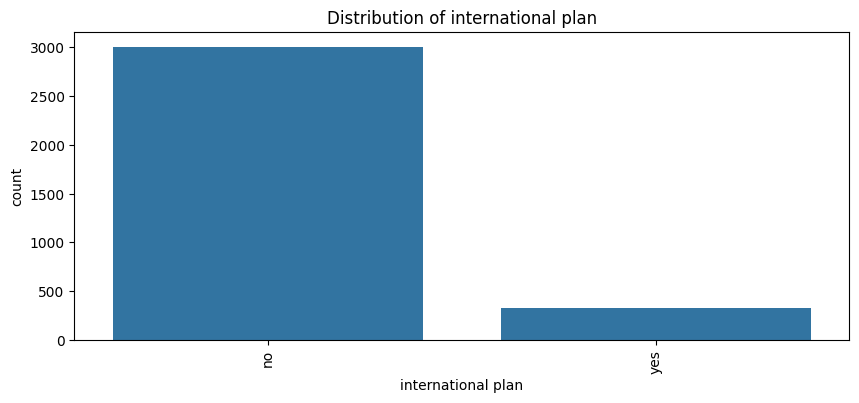

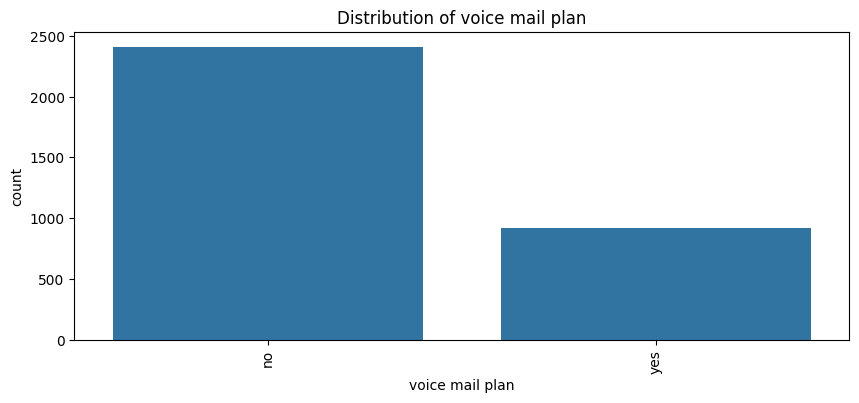

In [70]:
categoric_features = ['state', 'area code','international plan','voice mail plan']

for feature in categoric_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=feature, data=df, order=df[feature].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {feature}')
    plt.show()

Distribution of state
* Most of the customers are from **West Virginia,Minnesota,NewYork,Alabama and Wisconsin.**

Distribution of International plan
* Out of 3333 customers, **3010 (90.30%)** of the customers have no internation plan cover while **9.7%** of the customes have a international plan cover

Distributin of Voicemail plan
* Out of 3333 Telco customers , **2411(72.33%)** have a voicemail plan while **27.67%** have no voicemail plan

**B.) Bivariate Analysis**

Here we will explore the relationship or association between two variables in the dataset. It allows us to examine how changes in one variable are related to changes in another variable.

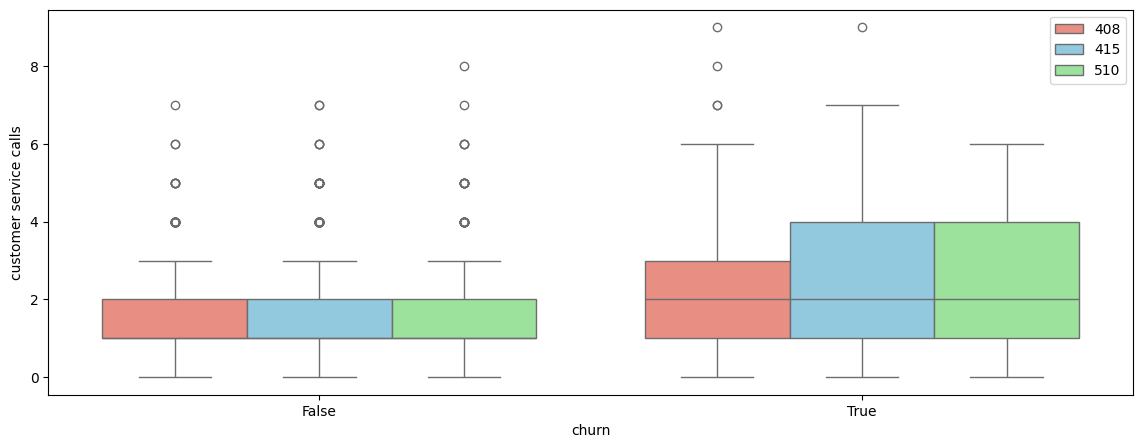

In [71]:
plt.figure(figsize=(14, 5))

# Define custom colors
custom_palette = {415: "skyblue", 408: "salmon", 510: "lightgreen"}

# Create the boxplot with custom colors
sns.boxplot(data=df, x='churn', y='customer service calls', hue='area code', palette=custom_palette)

plt.legend(loc='upper right')
plt.show()


We seem to have outliers in all area codes for customers who have not terminated their accounts(False).

Out of the customers who have terminated their account(True), they more likely have a 415 or a 510 area code and seem to have >= 4 customer service calls.

The churned customers in area code 408 seem to also have some few outliers.


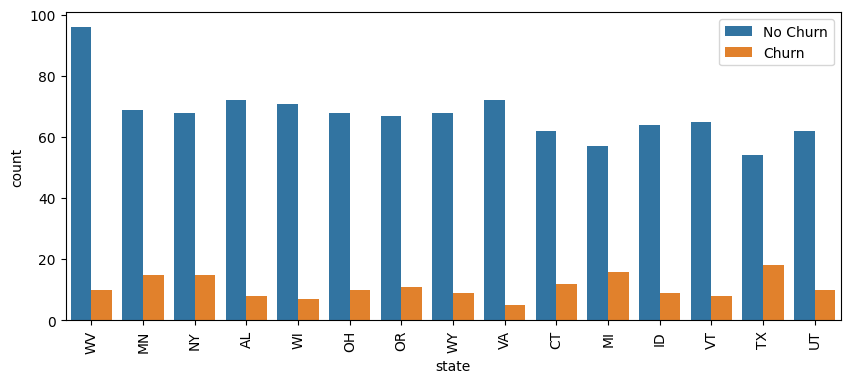

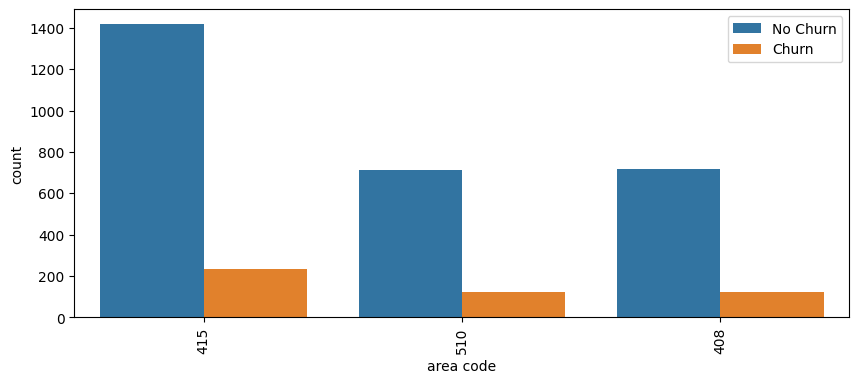

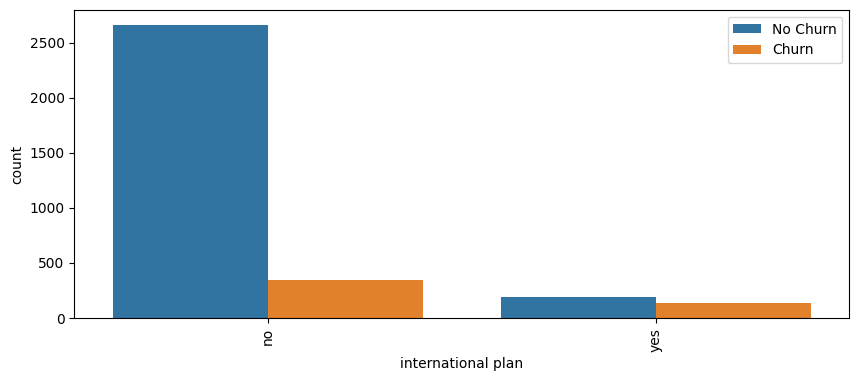

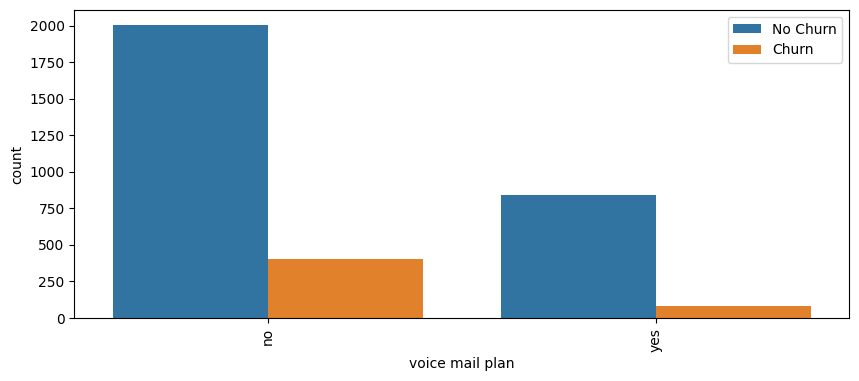

In [72]:
df['churn'] = df['churn'].replace({True: 'Churn', False: 'No Churn'})
for i in categoric_features:
    plt.figure(figsize=(10,4))
    sns.countplot(x=i, hue="churn", data=df,order= df[i].value_counts().iloc[0:15].index)
    plt.xticks(rotation=90)
    plt.legend(loc="upper right")
    plt.show()


Distribution of states against churn
* Customer who churned, majority are from **Texas, New Jersey, Maryland,Miami and NewYork.**

Distribution of voice mail plan against churn
* Customers who churned, majority have no voice mail plan

In [73]:
def plot_churn_kde(df, x_column, charge_type):
    """
    A function to plot features based on churn rate
    """
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=df, x=x_column, hue='churn', fill=True)
    plt.xlabel(f'Total {charge_type} Charge')
    plt.ylabel('Density')
    plt.title(f'Churn Distribution by {charge_type} Charges')
    plt.show()

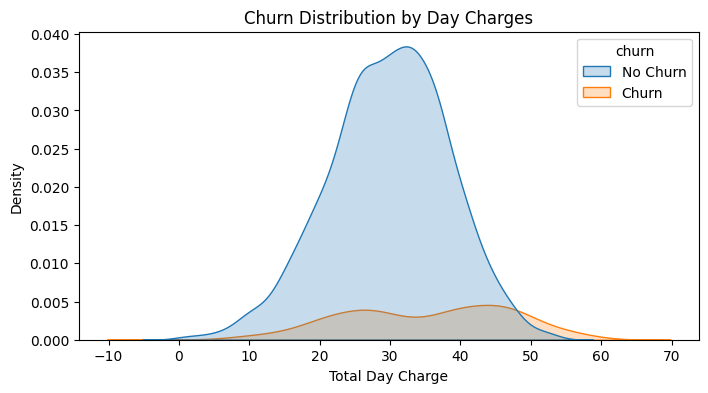

In [74]:
# Churn by day charges
plot_churn_kde(df, 'total day charge', 'Day')

 The plot indicates that non-churning customers have a concentrated range of day charges around 30, while churning customers are more evenly distributed across different day charges, with a generally lower density but a small secondary peak around 40. This suggests that while day charges are somewhat indicative of churn behavior, they are not the only factor.








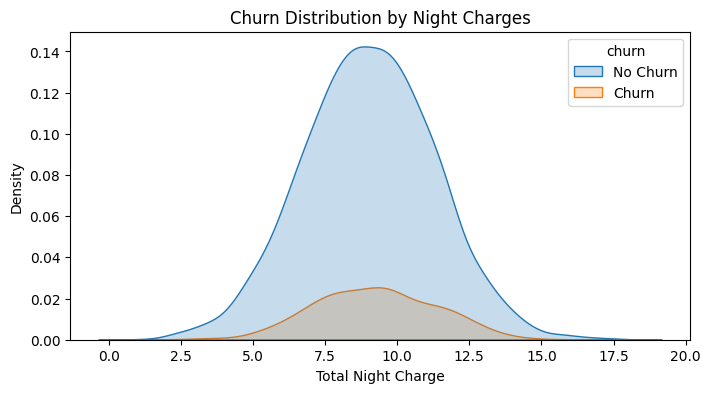

In [75]:
# Churn by night charges
plot_churn_kde(df, 'total night charge', 'Night')


The plot indicates that non-churning customers have a concentrated range of night charges around 10, while churning customers are more evenly distributed across different night charge values, with a generally lower density.

Churning customers have a more spread-out distribution with a generally lower density across all night charge values, suggesting that night charges are not a significant predictor of churn by themselves, as the distribution does not show a strong pattern differentiating churners from non-churners.

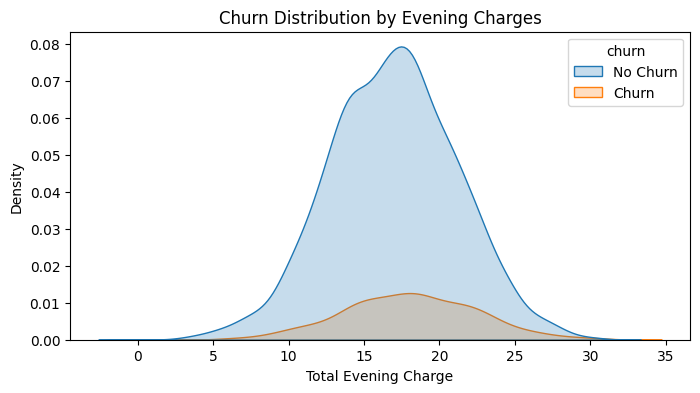

In [76]:
# Churn by evening charges
plot_churn_kde(df, 'total eve charge', 'Evening')

The plot indicates that non-churning customers have a concentrated range of evening charges around 17-18, while churning customers are more evenly distributed across different evening charge values, with a generally lower density. This suggests that evening charges alone are not a definitive predictor of customer churn.








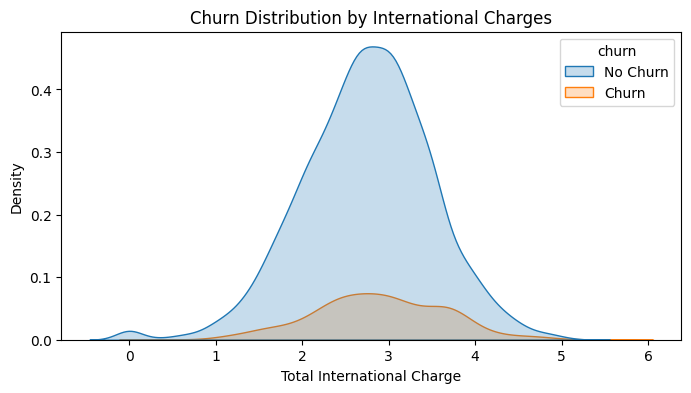

In [77]:
# Churn by international charges
plot_churn_kde(df, 'total intl charge', 'International')

The plot indicates that non-churning customers have a concentrated range of international charges around 2.5-3, while churning customers are more evenly distributed across different international charge values, with a generally lower density. This suggests that international charges alone are not a definitive predictor of customer churn.

### 3.3 Outlier detection

We noted that the unchurned customers seem to have some outliers in the boxplot shown in section

Which can indeed impact predictive analysis by introducing skewness or bias in the data, potentially leading to inaccuracies in the predictive models.

Dropping outliers past 3 standard deviations will help in improving the predictive models in unseen data

In [78]:
print("Before dropping numerical outliers, length of the dataframe is: ",len(df))
def drop_numerical_outliers(df, z_thresh=3):
    constrains = df.select_dtypes(include=[np.number]).apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    df.drop(df.index[~constrains], inplace=True)

drop_numerical_outliers(df)
print("After dropping numerical outliers, length of the dataframe is: ",len(df))

Before dropping numerical outliers, length of the dataframe is:  3333
After dropping numerical outliers, length of the dataframe is:  3169


### 3.4 Coorelation Heatmap



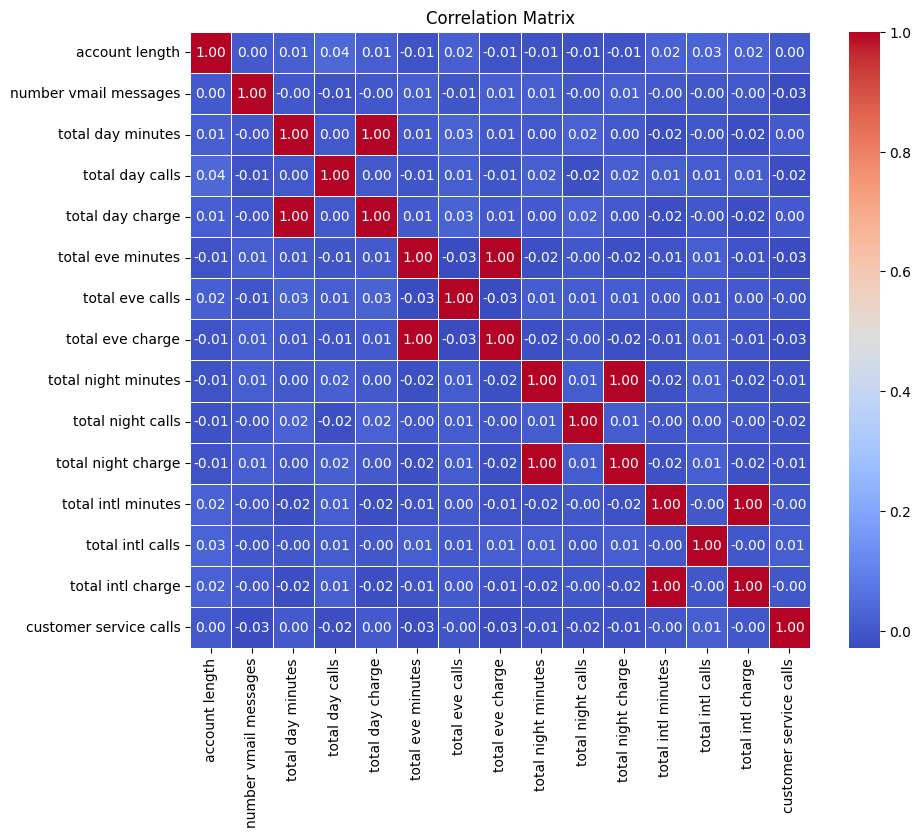

In [79]:
#Selecting only numeric columns
numeric_df = df[numeric_features]

# Calculate correlation matrix
corr = numeric_df.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Most of the features are not correlated however some do share a perfect correlation.
* `Total day charge` and `total day minutes` features are fully positively correlated.
* `Total eve charge` and `total eve minutes` features are fully positively correlated.
* `Total night charge` and `total night minutes` features are fully positively correlated.
* `Total int charge` and `total int minutes` features are fully positively correlated.

It's logical for the `charge-related features` to be correlated with the `minutes-related features` since the charge is directly influenced by the number of minutes used.

**A.)Checking for Multicollinearity**

In [80]:
# Calculate the correlation matrix and take the absolute value
corr_matrix = numeric_df.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.90)
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.90)]

# Drop the features
df = df.drop(to_drop, axis=1)

# Verify the dropped columns
print("Dropped columns:", to_drop)

Dropped columns: ['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']


### 3.5 Feature Engineering

Transforming "Churn" Feature's Rows into 0s and 1s using one label encoding

In [81]:
# Convert columns with 'True' or 'False' to binary using LabelEncoder
label_encoder = LabelEncoder()
df['churn'] = label_encoder.fit_transform(df['churn'])
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,110,45.07,99,16.78,91,11.01,3,2.70,1,1
1,OH,107,415,no,yes,26,123,27.47,103,16.62,103,11.45,3,3.70,1,1
2,NJ,137,415,no,no,0,114,41.38,110,10.30,104,7.32,5,3.29,0,1
3,OH,84,408,yes,no,0,71,50.90,88,5.26,89,8.86,7,1.78,2,1
4,OK,75,415,yes,no,0,113,28.34,122,12.61,121,8.41,3,2.73,3,1


Transforming categorical features into dummy variables as 0 and 1 to be able to use them in classification models using one-hot encoding.


In [82]:
df = pd.get_dummies(df,columns = ['state', 'area code','international plan','voice mail plan'],dtype=int)
df.head()

,account length,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,...,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,128,25,110,45.07,99,16.78,91,11.01,3,2.70,...,0,0,0,0,1,0,1,0,0,1
1,107,26,123,27.47,103,16.62,103,11.45,3,3.70,...,0,0,0,0,1,0,1,0,0,1
2,137,0,114,41.38,110,10.30,104,7.32,5,3.29,...,0,0,0,0,1,0,1,0,1,0
3,84,0,71,50.90,88,5.26,89,8.86,7,1.78,...,0,0,0,1,0,0,0,1,1,0
4,75,0,113,28.34,122,12.61,121,8.41,3,2.73,...,0,0,0,0,1,0,0,1,1,0


**A.) Data scaling**

 Scaling adjusts the range of values for different features so they're all on a similar scale. This helps algorithms work better because they won't be overly influenced by features with larger values.

In [83]:
scaler = MinMaxScaler()

def scaling(columns):
    return scaler.fit_transform(df[columns].values.reshape(-1,1))

for i in df.select_dtypes(include=[np.number]).columns:
    df[i] = scaling(i)
df.head()

,account length,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,...,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,0.587963,0.510204,0.576271,0.773956,0.487179,0.490082,0.422414,0.643644,0.2,0.487585,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.490741,0.530612,0.686441,0.450248,0.521368,0.483858,0.525862,0.675974,0.2,0.713318,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.629630,0.000000,0.610169,0.706088,0.581197,0.238040,0.534483,0.372520,0.4,0.620767,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.384259,0.000000,0.245763,0.881184,0.393162,0.042007,0.405172,0.485672,0.6,0.279910,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.342593,0.000000,0.601695,0.466250,0.683761,0.327888,0.681034,0.452608,0.2,0.494357,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


## 4.Modelling

We are now going to build models that can predict the customer churn based on the features in our dataset. We will evaluate the model using the recall score metric.


Specifically, if it achieves a recall score of 80% or higher, it will be considered a success.

In order to achieve the targets stipulated in the project proposal, we will be using the following algorithms:

* Logistic Regression
* Decision Tree
* Random Forest
* XG Boost

We will also proceed to use the `ROC_AUC` metric to evaluate the performance of our models.

As for dealing with class imbalance, we will use `SMOTE` to generate synthetic examples of the minority class in our dataset

In [84]:
#Defining X and y
X = df.drop("churn", axis=1)
y = df["churn"]

###**4.1 Train-test split**

We're going to split train and test data using a test size of `0.25`

In [85]:
#splitting the data in to train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=123)

### 4.2 SMOTE TEST

`SMOTE `stands for Synthetic Minority Oversampling and is a powerful way of dealing with class imbalances.

It is an oversampling technique tailored for datasets containing both numerical and categorical features, to address class imbalance in machine learning datasets.

The technique aims to balance class distribution by randomly increasing minority class examples by replicating them.

In [86]:
#instantiate SMOTENC
from imblearn.over_sampling import SMOTE, SMOTENC

smote = SMOTENC(categorical_features = [1,2],random_state = 123)
resampled_X_train, resampled_y_train = smote.fit_resample(X_train,y_train)

### 4.3 Model 1 - Logistic Regression Classifier

Logistic regression is a classification algorithm, used when the value of the target variable is categorical in nature.

It is most commonly used when the data in question has binary output, so when it belongs to one class or another, or is either a 0 or 1.

This method will be used to create a baseline model.


In [87]:
#instantiate the logistic regression
logreg = LogisticRegression(random_state=123)

In [88]:
# Fit the model on the training data
logreg.fit(resampled_X_train, resampled_y_train)
#predict on the labels of test set
y_pred_log = logreg.predict(X_test)

In [89]:
def plot_confusion_matrix(y_true, y_pred, classes):
    """
    Plots a confusion matrix.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

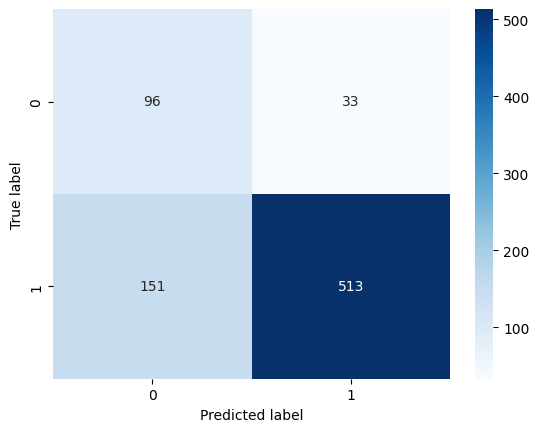

In [90]:
plot_confusion_matrix(y_test, y_pred_log, [0,1])

In [91]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

         0.0       0.39      0.74      0.51       129
         1.0       0.94      0.77      0.85       664

    accuracy                           0.77       793
   macro avg       0.66      0.76      0.68       793
weighted avg       0.85      0.77      0.79       793



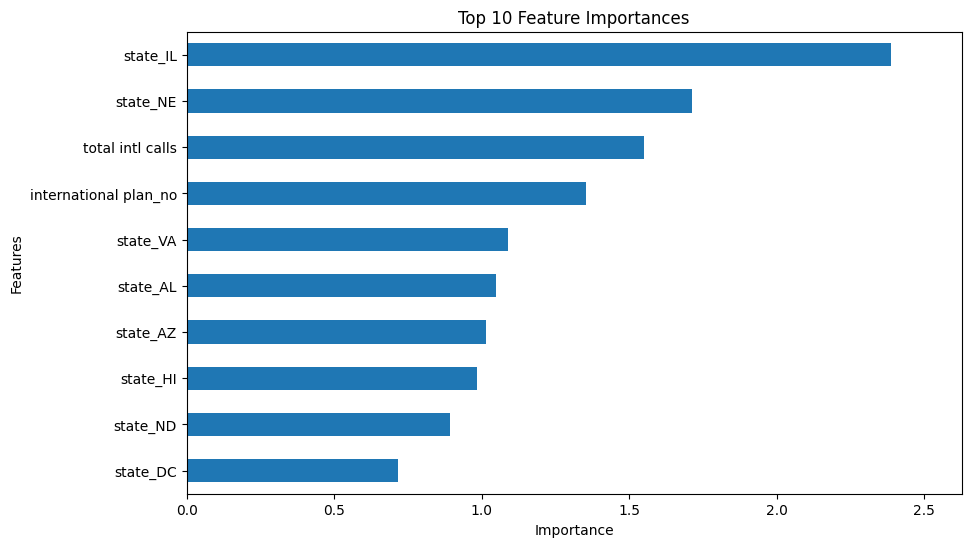

In [92]:
# Feature Importances
importance = logreg.coef_[0]
feature_names = resampled_X_train.columns
feature_importances = pd.Series(importance,index=feature_names)
feature_importances = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
top_features = feature_importances[:10]  # Select the top 10 features
top_features.sort_values().plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances')
plt.xlim(0, max(top_features)* 1.1)  # Set the xlim to the maximum importance value
plt.show()

The logistic regression model shows a 0.77 recall score, The confusion matrix evaluation showed that the model had a higher number of true positives and true negatives than false positives and false negatives. This indicates that the model is making correct predictions more often than incorrect ones and is not overfitting.

### 4.4. Model 2 - Decision tree classifier

In [93]:
decision_tree = DecisionTreeClassifier(random_state=123)

#Fit on the training data
decision_tree.fit(resampled_X_train,resampled_y_train)

#predict on the test set
y_pred_dt = decision_tree.predict(X_test)

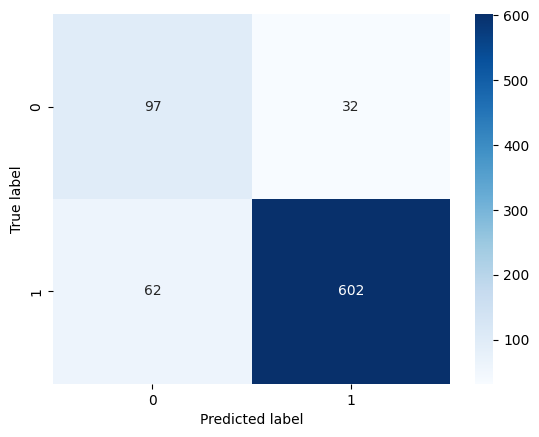

In [94]:
plot_confusion_matrix(y_test, y_pred_dt, [0,1])

In [95]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.61      0.75      0.67       129
         1.0       0.95      0.91      0.93       664

    accuracy                           0.88       793
   macro avg       0.78      0.83      0.80       793
weighted avg       0.89      0.88      0.89       793



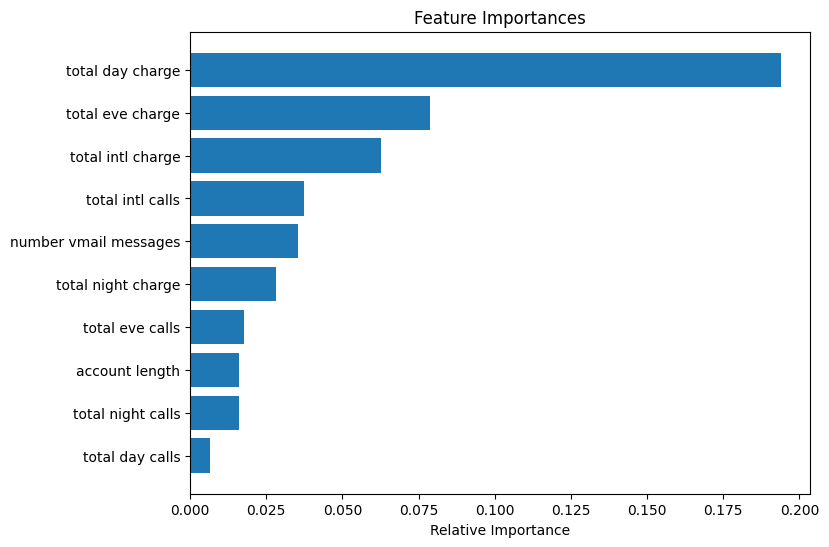

In [96]:
# Feature Importances
feature_names = list(resampled_X_train.columns)
importances = decision_tree.feature_importances_[0:10]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The decision tree model has a recall score of 0.91, which is actually good but not better than our baseline model. This means that the model can identify around 91% of the actual positive instances correctly.

The confusion matrix evaluation showed that the model had a higher number of true positives and true negatives than false positives and false negatives. This indicates that the model is making correct predictions more often than incorrect ones and is not overfitting.

According to the model, **total day charge, total eve charge, total intl charge** are the top three most important features.

### 4.5. Model 3 - Random Forest Classifier

In [97]:
#Instantiate the classifier
rf= RandomForestClassifier(random_state=123)

#Fit on the training data
rf.fit(resampled_X_train,resampled_y_train)

#predict on the test data
y_pred_rf = rf.predict(X_test)

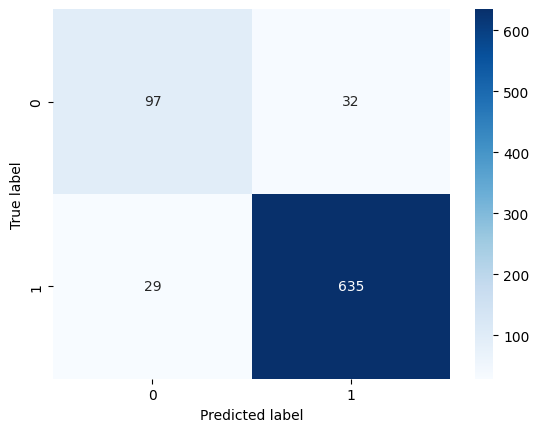

In [98]:
plot_confusion_matrix(y_test, y_pred_rf, [0,1])

In [99]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.77      0.75      0.76       129
         1.0       0.95      0.96      0.95       664

    accuracy                           0.92       793
   macro avg       0.86      0.85      0.86       793
weighted avg       0.92      0.92      0.92       793



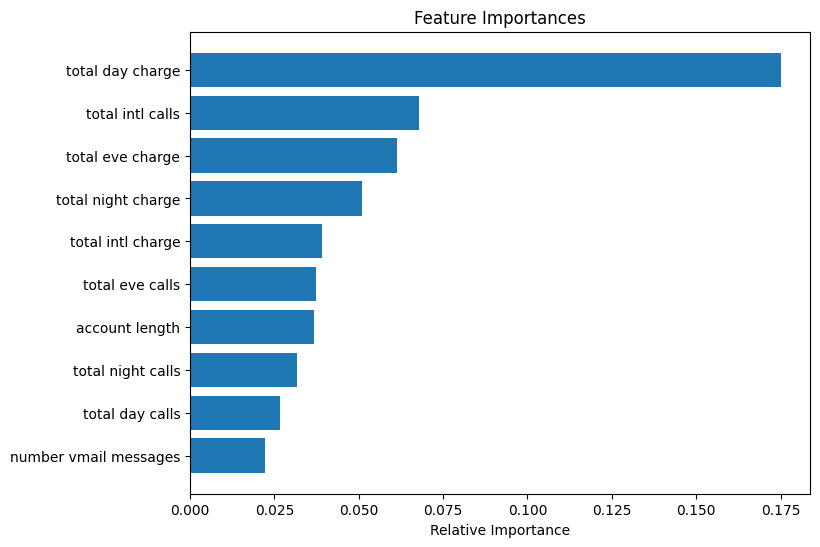

In [100]:
feature_names = list(resampled_X_train.columns)
importances = rf.feature_importances_[0:10]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The random forest classifier model has a recall score of 0.96, which is great compared to the previous model. This means that the model can identify around 96% of the actual positive instances correctly.

The confusion matrix evaluation showed that the model had a higher number of true positives and true negatives than false positives and false negatives. This indicates that the model is making correct predictions more often than incorrect ones and is not overfitting.

According to the model, **total day charge, total intl calls, total eve charge** are the top three most important features.

### 4.6. Model 4 - XGBoost Classifier

In [101]:
from xgboost import XGBClassifier

#instantiate XGBClassifier
xg = XGBClassifier(random_state=123)

#Fit on the training data
xg.fit(resampled_X_train,resampled_y_train)

#predict on the test data
y_pred_xg = xg.predict(X_test)

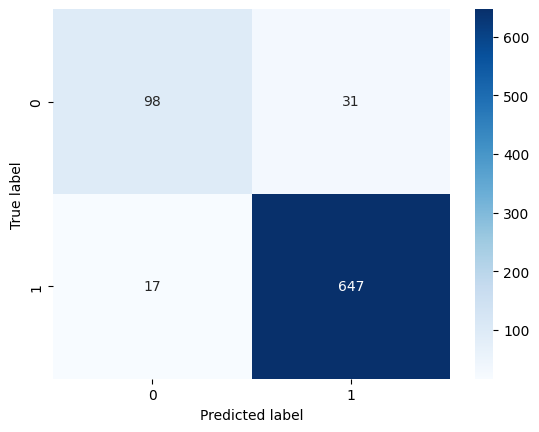

In [102]:
plot_confusion_matrix(y_test, y_pred_xg, [0,1])

In [103]:
print(classification_report(y_test,y_pred_xg))

              precision    recall  f1-score   support

         0.0       0.85      0.76      0.80       129
         1.0       0.95      0.97      0.96       664

    accuracy                           0.94       793
   macro avg       0.90      0.87      0.88       793
weighted avg       0.94      0.94      0.94       793



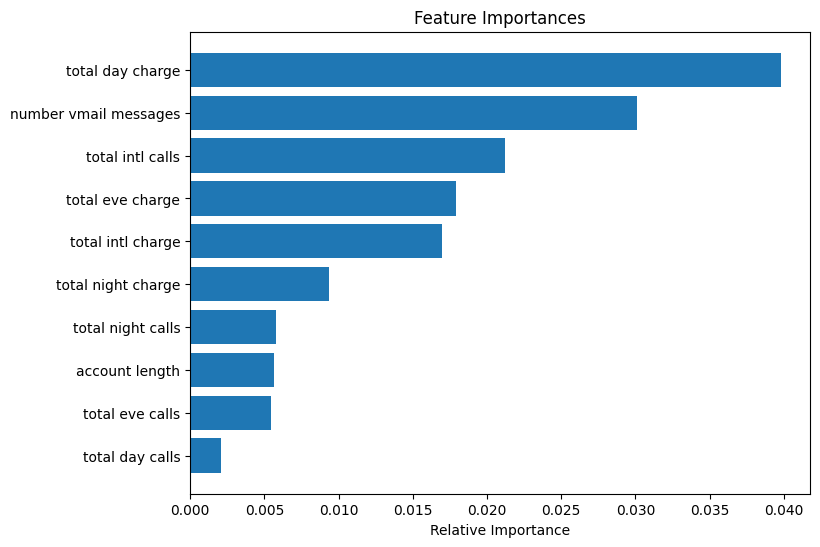

In [104]:
feature_names = list(resampled_X_train.columns)
importances = xg.feature_importances_[0:10]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The XGBoost classifier model has a recall score of 0.97, which is actually better than all the previous models. This means that the model can identify around 97% of the actual positive instances correctly.

The confusion matrix evaluation showed that the model had a higher number of true positives and true negatives than false positives and false negatives. This indicates that the model is making correct predictions more often than incorrect ones and is not overfitting.

According to the model,**total day charge, total intl calls, number vmail messages** are the top three most important features.

## 5. Model Evaluation

Model evaluation is where we'll evaluate models based on recall score and ROC_AUC. After, we will the best two models to tune them for better perfomance.

###5.1 Models Comparison using Recall Score

The recall score is a measure of how many of the positive instances the model correctly identifies. A higher recall score indicates that the model is better at identifying positive instances.

In [105]:
np.random.seed(123)

classifiers = [LogisticRegression(),
               RandomForestClassifier(),
               DecisionTreeClassifier(),
               XGBClassifier()]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'recall'])

# Train the models and record the results
results = []

for cls in classifiers:
    model = cls.fit(resampled_X_train, resampled_y_train)
    y_pred = model.predict(X_test)

    recall = recall_score(y_test, y_pred)

    results.append({'classifiers': cls.__class__.__name__, 'recall': recall})

# Convert the results list to a DataFrame and set the index
result_table = pd.DataFrame(results)
result_table.set_index('classifiers', inplace=True)

print(result_table)

                          recall
classifiers                     
LogisticRegression      0.772590
RandomForestClassifier  0.956325
DecisionTreeClassifier  0.902108
XGBClassifier           0.974398


The results table shows that the `XGBoostClassifier` has the highest recall score, followed by RandomForestClassifier and, decision tree classifier.The `logisticregression` Classifier has the lowest recall score of **0.77.**

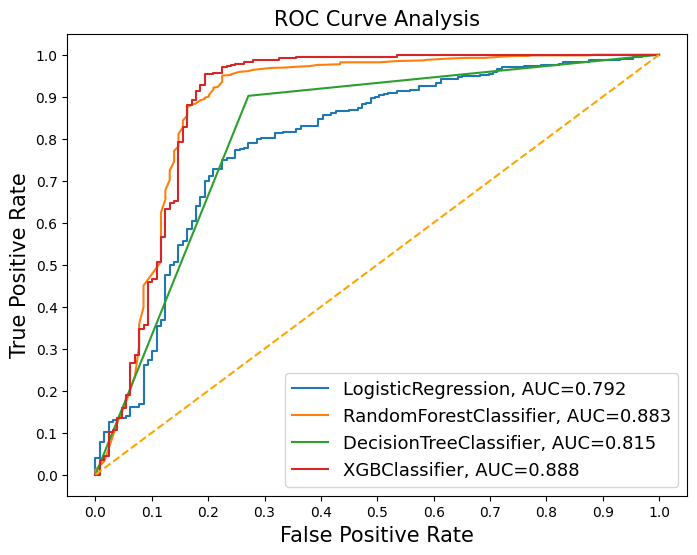

In [106]:
np.random.seed(123)

classifiers = [LogisticRegression(),
               RandomForestClassifier(),
               DecisionTreeClassifier(),
               XGBClassifier()]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr', 'tpr', 'auc'])

# Train the models and record the results
results = []

for cls in classifiers:
    model = cls.fit(resampled_X_train, resampled_y_train)
    yproba = model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, yproba)
    auc = roc_auc_score(y_test, yproba)

    results.append({'classifiers': cls.__class__.__name__, 'fpr': fpr, 'tpr': tpr, 'auc': auc})

# Convert the results list to a DataFrame
result_table = pd.DataFrame(results)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

The ROC curve analysis shows that the `XGBClassifier `has the best performance, followed by the `RandomForestClassifier`, `DecisionTreeClassifier`, and `LogisticRegression`. The `XGBClassifier` has the highest AUC score of 0.888, while the LogisticRegression has the lowest AUC score of 0.792.

A higher AUC score indicates that the classifier is better at distinguishing between positive and negative instances.



## 6. Conclusion

The recall score of our XGB classifier was 97%. Which was above our recalls score of 0.80 which shows it is a commendable predictive model, Our primary objective of predicting customer churn with an acceptable recall score has been achieved.

###Recommendations
**1. State-Specific Retention Strategies:**

Focus on customer retention strategies in states with higher churn rates, such as Texas, New Jersey, Maryland, Miami, and New York. This can involve targeted marketing campaigns, personalized offers, or improved customer support tailored to the specific needs and preferences of customers in these states.

**2. Targeted Promotions:**

Offer discounts or promotional offers to customers in area codes 415 and 510, where churn rates are higher. These incentives can help retain customers in these specific regions.

**3. Pricing Evaluation:**

Review the pricing structure for day, evening, night, and international charges. Consider adjusting pricing plans or introducing discounted packages to address higher charges associated with customer churn.

**4. Customer Service Enhancements:**

Improve the quality of customer service and reduce the number of service calls. Invest in enhanced training programs for customer service representatives to ensure prompt and effective issue resolution, leading to increased customer satisfaction and lower churn rates.

**5. Voicemail Plan Enhancement:**

Enhance the value proposition of the voicemail plan to increase adoption among customers. Highlight the benefits and convenience of voicemail services, and consider offering additional features or discounts to encourage customers to sign up.










